# Simple Image Classifier

The first image classifications was made by machine learn models, as the regression and classifier models. Before the very powerful convolution models, the challenge  of image recognition started with the methods aforementioned, obtaining considerable results for the image recognition field. In this example, we explore the image classification using two machine learn models, Logistic Regression and K-nearest neighbors (KNN).
We also use the compvis module to load the images from disk and, preprocess them. For this example, we resize all the image without considering the aspect ratio. To evaluate the classification models, we consider as metrics the accuracy, recall and F1 score. 

**Dataset**

For this exercise, we consider the Animals dataset, composed by three classes, Dog, Cat and Panda. The images for the Dogs and Cats, come from the [Dogs vs Cats Kaggle challenge](https://www.kaggle.com/c/dogs-vs-cats). The images for the Pandas, come from the [ImageNet dataset](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description) ([the most highly-used subset of ImageNet is the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification and localization dataset](https://image-net.org/download.php)). In total, the dataset has 3000 data points (images), equal distributed among the three classes.

## Importing libraries

Here, we apply the computer vision module (compvis) to load and preprocess the images.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from compvis.preprocessing import SimplePreprocessor # compvis module
from compvis.datasets import SimpleDatasetLoader
from imutils import paths
import matplotlib.pyplot as plt
import cv2 as cv

Using TensorFlow backend.


## Setting the image paths

The folder for the dataset Animals contains three others folders, each folder corresponds to a certain class. We set the path for the dataset, from it, we make a list with all image paths.

In [2]:
dataset = "/home/igor/Documents/Artificial_Inteligence/Datasets/Animals" # dataset path
imagePaths = list(paths.list_images(dataset)) # creating a list of images paths

## Loading images from disk

Fist off all, we are going to load the images from disk with the sub-module datasets and the class SimpleDatasetLoader, for the moment we do not consider any transformation, because we want to visualize the original image for each class.

The labelization is made by the load function from the SimpleDatasetLoader object. The function split the path and grab the class, considering that the path is Animals/dog/img1.

In [3]:
sdl = SimpleDatasetLoader(preprocessors=None)
(data, labels) = sdl.load(imagePaths, verbose=500)

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


**Visualizing the classes**

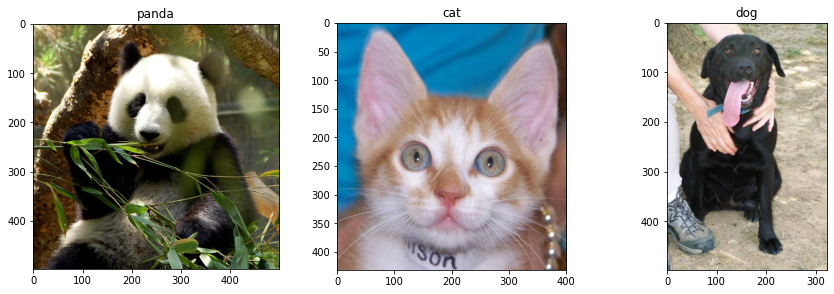

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title("panda")
plt.imshow(cv.cvtColor(data[0], cv.COLOR_BGR2RGB))
plt.subplot(2,3,2)
plt.title("cat")
plt.imshow(cv.cvtColor(data[1000], cv.COLOR_BGR2RGB))
plt.subplot(2,3,3)
plt.title("dog")
plt.imshow(cv.cvtColor(data[-2], cv.COLOR_BGR2RGB))
plt.show()

**loading images from disk and resizing them**

Here, we reload the images from disk, but this time we apply the SimplePreprocessor object, that resizes the images without considering the aspect ratio. We downsize the images to $(32,32)$. The arguments required for the SimplePrepocessor are the desired width and height. For the object SimpleDatasetLoader, in this time we put the list with preprocessors, in this way, we load and preprocess the images.

In [5]:
sp = SimplePreprocessor(32, 32) # object to resize
sdl = SimpleDatasetLoader(preprocessors=[sp]) # object to load from disk and process
(data, labels) = sdl.load(imagePaths, verbose=500) # function load

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


We must reshape the data. As we know, images are represented by three color channels, RGB. Each channel is represented by a $32x32$ array, totaling 1024 points, but as we have three channels, the total of points will be $3072$. So, our data set is represented by $3000$ images, each image is considered a data point, totaling $3000$ rows, and $3072$ features columns.

In [6]:
data = data.reshape((data.shape[0], 3072))

In [7]:
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1000.0)))

[INFO] features matrix: 9.0MB


## Enconding the labels

In [8]:
le = LabelEncoder()
labels = le.fit_transform(labels)

## Splitting the dataset into training and test set

In [9]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

## Building the classification models with scikit-learn 

For the classification task, we consider two classifier, one build with a Logistic Regression Model, the other with a K-nearest neighbors model. We start using directly the GridSearchCV from scikit-learn library. This object allows us to train the model testing several hyper parameters, in this way we consider the best model.

For each model, we create a dictionary that has as key the parameters to be trained. We consider for the Regression model the parameters $C$ and solver, the first for the regularization and, the second for the optimization. For the KNN model, we consider the number of neighbors and the weights. Additionally, we consider for the both models a number of five cross validation.

In [ ]:
# Logistic Regression
params1 = {"C": [0.0001, 0.001, 0.01, 0.1, 1.0], "solver" : ['newton-cg', 'lbfgs', 'sag', 'saga']}
model1 = GridSearchCV(LogisticRegression(max_iter=150), params1, cv=5, n_jobs=-1)
model1.fit(X_train, y_train)
print("[INFO] best hyperparameters: {}".format(model1.best_params_))

# KNN
params2 = {"n_neighbors": [1, 5, 10], "weights" : ['uniform', 'distance']}
model2 = GridSearchCV(KNeighborsClassifier(), params2, cv=5, n_jobs=-1) 
model2.fit(X_train, y_train)
print("[INFO] best hyperparameters: {}".format(model2.best_params_))

### Predicting on the test set

In [13]:
preds1 = model1.predict(X_test) # for the model 1
preds2 = model2.predict(X_test) # for the model 2

### Evaluating the results

In [14]:
print("Logistic Regression")
print(classification_report(y_test, preds1, target_names=le.classes_))
print("K-nearest neighbors")
print(classification_report(y_test, preds2, target_names=le.classes_))

Logistic Regression
              precision    recall  f1-score   support

         cat       0.52      0.56      0.54       249
         dog       0.48      0.50      0.49       239
       panda       0.77      0.69      0.73       262

    accuracy                           0.59       750
   macro avg       0.59      0.58      0.59       750
weighted avg       0.60      0.59      0.59       750

K-nearest neighbors
              precision    recall  f1-score   support

         cat       0.49      0.63      0.55       249
         dog       0.40      0.54      0.46       239
       panda       0.91      0.39      0.54       262

    accuracy                           0.51       750
   macro avg       0.60      0.52      0.52       750
weighted avg       0.61      0.51      0.52       750



## Conclusions

The results show an interesting aspect, the class Panda has a better accuracy, maybe it's due the predominance of the black and white colors. These features can lead the Panda class to a higher accuracy. The most problem here is, the model do not understand the deep features. We can say, the model just see a large visual field, the more complicated details are ignored. The accuracy average is not bad, but not enough to be considered a robust model. 

About the models, both models have closely performance, but if we must choose one of them, the best.